In [159]:
!pip install pandas==1.3.5

In [160]:
import pandas_datareader as pdr
key='5c8d4db97b48a803cff150a77ff468a2786f8483'

In [161]:
import pandas as pd
import pandas_datareader as pdr
print("pandas version:", pd.__version__)
print("pandas_datareader version:", pdr.__version__)


pandas version: 1.3.5
pandas_datareader version: 0.10.0


In [162]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.10/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [163]:
df.to_csv('AAPL.csv')

In [164]:
import pandas as pd

In [165]:
df = pd.read_csv('AAPL.csv')

In [166]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.18,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0
1,AAPL,2019-04-11 00:00:00+00:00,198.95,201.00,198.44,200.85,20900808,47.880741,48.374109,47.758001,48.338009,83603232,0.0,1.0
2,AAPL,2019-04-12 00:00:00+00:00,198.87,200.14,196.21,199.20,27760668,47.861487,48.167135,47.221313,47.940908,111042672,0.0,1.0
3,AAPL,2019-04-15 00:00:00+00:00,199.23,199.85,198.01,198.58,17536646,47.948128,48.097341,47.654514,47.791694,70146584,0.0,1.0
4,AAPL,2019-04-16 00:00:00+00:00,199.25,201.37,198.56,199.46,25696385,47.952941,48.463155,47.786881,48.003481,102785540,0.0,1.0


In [167]:
df1 = df.reset_index()['close']

In [168]:
df1.shape

(1256,)

In [169]:
df1

0       200.62
1       198.95
2       198.87
3       199.23
4       199.25
         ...  
1251    170.03
1252    168.84
1253    169.65
1254    168.82
1255    169.58
Name: close, Length: 1256, dtype: float64

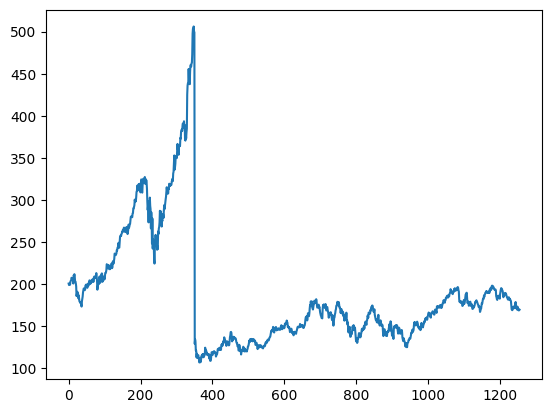

In [170]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [171]:
import numpy as np

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))


In [173]:
df1.shape

(1256, 1)

In [174]:
df1

array([[0.23489042],
       [0.23070758],
       [0.2305072 ],
       ...,
       [0.15731997],
       [0.15524108],
       [0.15714465]])

In [175]:
#splitting data set into train and test
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size

train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [176]:
train_data

array([[2.34890420e-01],
       [2.30707577e-01],
       [2.30507201e-01],
       [2.31408892e-01],
       [2.31458986e-01],
       [2.41177207e-01],
       [2.43005636e-01],
       [2.44683782e-01],
       [2.52072636e-01],
       [2.51271133e-01],
       [2.46562304e-01],
       [2.44107702e-01],
       [2.44884158e-01],
       [2.35015654e-01],
       [2.59686913e-01],
       [2.56255479e-01],
       [2.62767689e-01],
       [2.54577332e-01],
       [2.40500939e-01],
       [2.40601127e-01],
       [2.35140889e-01],
       [2.26274264e-01],
       [1.97570445e-01],
       [2.04934252e-01],
       [2.10594865e-01],
       [2.08490920e-01],
       [2.05785848e-01],
       [1.90983093e-01],
       [1.99774577e-01],
       [1.90206637e-01],
       [1.82391985e-01],
       [1.80663745e-01],
       [1.78810269e-01],
       [1.76681277e-01],
       [1.78985598e-01],
       [1.70895429e-01],
       [1.66462116e-01],
       [1.82341891e-01],
       [1.89605510e-01],
       [1.96318096e-01],


In [177]:
training_size,test_size

(816, 440)

In [178]:
import numpy

#dense array -> spare matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [179]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [180]:
print(X_train.shape)
print(y_train.shape)

(715, 100)
(715,)


In [181]:
print(X_test.shape)
print(ytest.shape)

(339, 100)
(339,)


In [182]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [184]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [185]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 335ms/step - loss: 0.0401 - val_loss: 5.1065e-04
Epoch 2/100
12/12 [==============================] - 4s 325ms/step - loss: 0.0136 - val_loss: 3.0813e-04
Epoch 3/100
12/12 [==============================] - 6s 469ms/step - loss: 0.0112 - val_loss: 5.4524e-04
Epoch 4/100
12/12 [==============================] - 5s 423ms/step - loss: 0.0092 - val_loss: 0.0020
Epoch 5/100
12/12 [==============================] - 6s 526ms/step - loss: 0.0084 - val_loss: 3.0705e-04
Epoch 6/100
12/12 [==============================] - 5s 402ms/step - loss: 0.0067 - val_loss: 7.8366e-04
Epoch 7/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0063 - val_loss: 7.4337e-04
Epoch 8/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 9/100
12/12 [==============================] - 3s 290ms/step - loss: 0.0054 - val_loss: 9.3754e-04
Epoch 10/100
12/12 [==============================] - 2s 188ms

In [187]:
import tensorflow as tf

In [188]:
tf.__version__

'2.15.0'

In [189]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [190]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [191]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

218.9545540216043

In [192]:
math.sqrt(mean_squared_error(ytest,test_predict))

172.89472822184715

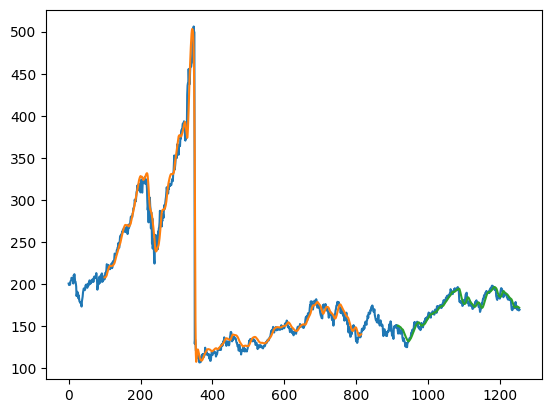

In [193]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [194]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [195]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [196]:
temp_input

[0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0.1987476518472135,
 0.19724483406386972,
 0.19807138384470874,
 0.19233562930494674,
 0.18995616781465247,
 0.20485911083281144,
 0.21219787100814025,
 

In [197]:
#prediction for next days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 99,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.16077083]
100
[0.16077083]
101
2 day input [0.20187852 0.2033062  0.20756418 0.20751409 0.21192235 0.20989355
 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259 0.20816531
 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236
 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321
 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034
 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912
 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563
 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168
 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258
 0.19789606 0.20247965 0.20653726 0.20681277 0.20408265 0.20541014
 0.20115216 0.19586725 0.19363807 0.19291171 0.18902943 0.18715091
 0.18905448 0.1941891  0.18955542 0.18614903 0.18983093 0.18680025
 0.1851221  0.18239198 0.17097057 0.15849718 0.15599249 0.15569192
 0.16002505 0.16508453 0.16628679 0.16102693 0.16571071 0.16475892
 0.16751409 0.173

In [198]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [199]:
import matplotlib.pyplot as plt

In [200]:
len(df1)

1256

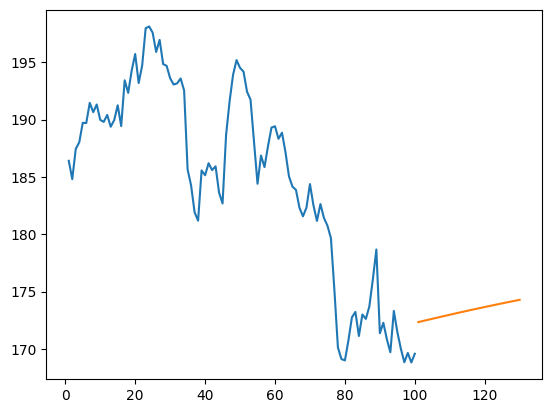

In [211]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

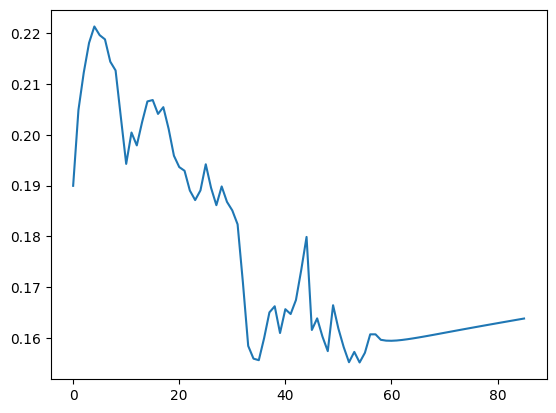

In [202]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [203]:
df3=scaler.inverse_transform(df3).tolist()

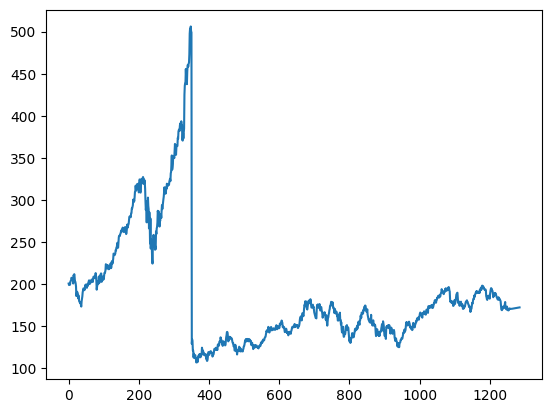

In [204]:
plt.plot(df3)

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, return_sequences=True, input_shape=(100, 1)))  # First RNN layer
rnn_model.add(SimpleRNN(50, return_sequences=True))  # Second RNN layer
rnn_model.add(SimpleRNN(50))  # Third RNN layer, not returning sequences here as we are about to connect to a dense output layer
rnn_model.add(Dense(1))  # Output layer

# Compiling model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
rnn_model.summary()

# Fitting model
rnn_model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test, ytest))


train_predict = rnn_model.predict(X_train)
test_predict = rnn_model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 50)           2600      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100, 50)           5050      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12751 (49.81 KB)
Trainable params: 12751 (49.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 4s 118ms/step - loss: 0.1166 - val_loss: 0.0035
Epoch 2/100
12/12 [==============================

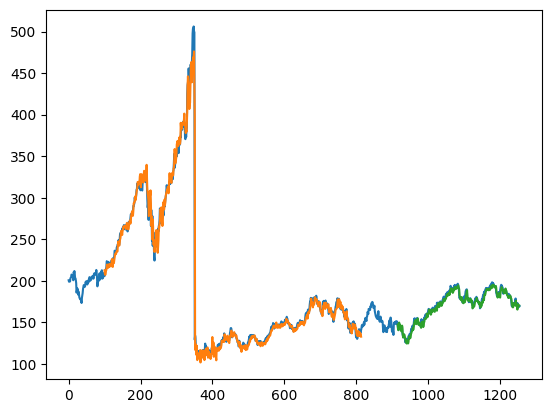

In [206]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [207]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

216.31703566559653

In [208]:
math.sqrt(mean_squared_error(ytest,test_predict))

170.87439823024533

In [209]:
#prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)


0 day input [0.21592987 0.21618034 0.21725736 0.21462743 0.19737007 0.19388854
 0.18802755 0.18619912 0.19716969 0.19611772 0.19874765 0.19724483
 0.19807138 0.19233563 0.18995617 0.20485911 0.21219787 0.21803381
 0.22126487 0.21956168 0.21873513 0.21435191 0.21262367 0.20338134
 0.19426425 0.2004258  0.19789606 0.20247965 0.20653726 0.20681277
 0.20408265 0.20541014 0.20115216 0.19586725 0.19363807 0.19291171
 0.18902943 0.18715091 0.18905448 0.1941891  0.18955542 0.18614903
 0.18983093 0.18680025 0.1851221  0.18239198 0.17097057 0.15849718
 0.15599249 0.15569192 0.16002505 0.16508453 0.16628679 0.16102693
 0.16571071 0.16475892 0.16751409 0.17342517 0.17991234 0.16162805
 0.16390733 0.16032561 0.15747026 0.16648716 0.16190357 0.15827176
 0.15529117 0.15731997 0.15524108 0.15714465 0.16077083 0.16077083
 0.15969695 0.15953222 0.15950483 0.15956114 0.15966782 0.15980531
 0.15996252 0.16013287 0.16031235 0.1604981  0.160688   0.16088042
 0.161074   0.16126771 0.16146089 0.16165304 0.161